In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Obtenemos los campos de la base de medidas
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Obtenemos los campos de la base de estación
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [10]:
engine.execute('SELECT * FROM measurement ').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [11]:
engine.execute('SELECT * FROM station ').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
# Save a reference to the station table as `Station`
Station = Base.classes.station

In [13]:
# Save a reference to the measurement table as `measurement`
Measurement= Base.classes.measurement

In [14]:
# Create a database session object
session = Session(engine)

In [15]:
# Hay que encontrar la fecha mas actualizada y de ahi nos vamos un  año para atrás
fecha1=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(fecha1)

('2017-08-23',)


In [16]:
#Asignamos un año atras a last year
lastyear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(lastyear)

2016-08-23


In [17]:
#Hacemos la base de precipitacion por día del año entre el 23/08/2017 y el 23/08/2016
prcp_base= session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > lastyear).\
    order_by(Measurement.date).all()
#y la pasamo al Data Frame
prcp_base1 = pd.DataFrame(prcp_base)
prcp_base1.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


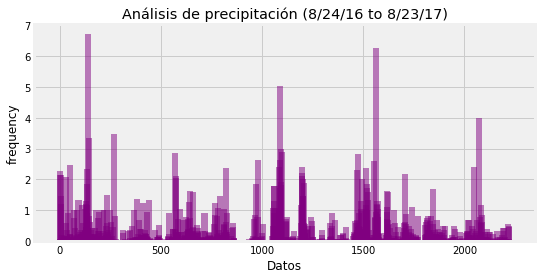

In [18]:
#graficamos la precipitacion por datos
x_axis = np.arange(len(prcp_base1))
plt.figure(figsize = (8, 4))
plt.bar(x_axis,prcp_base1["prcp"] ,width=30,color="purple", alpha=.5, align="center")
plt.title("Análisis de precipitación (8/24/16 to 8/23/17)")
plt.xlabel("Datos")
plt.ylabel("frequency")
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, delito1["Conducta"],rotation=90)

# Save the Figure
plt.savefig("Precipitación.png", bbox_inches='tight')

# Show the Figure
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_base1.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?

locaciones = session.query(Measurement).group_by(Measurement.station).count()
print("La Cantidad de Locaciones es:",locaciones)

La Cantidad de Locaciones es: 9


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
estaciones=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
estaciones

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# ESTE CAMINO ES PO DATAFRAME
medicion=engine.execute('SELECT * FROM measurement ').fetchall()
medicion=pd.DataFrame(medicion)
medicion=medicion.rename(columns={0:"ID",1:"station",2:"date",3:"prcp",4:"tobs"})
medicion["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [23]:
# Obtener la estación más activa
mas_activa=estaciones[0][0]

#query para el nombre
estacion_nombre = (session.query(Station.name).filter_by(station = mas_activa))
estacion_nombre = estacion_nombre[0][0]
print("La estación más activa es ",mas_activa," ",estacion_nombre)

#query el promedio de temparaturas
prom_temp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == mas_activa))
prom_temp = '{0:.4}'.format(prom_temp[0][0])
print("El promedio es:", prom_temp," Farenheit")

#query la más lata temperatura
max_temp = (session.query(Measurement.tobs).filter(Measurement.station == mas_activa)
                      .order_by(Measurement.tobs.desc())
                      .first())
max_temp = max_temp[0]
print("la más alta temperatura: ", max_temp," Farenheit")

#query para la temperatura minima
min_temp = (session.query(Measurement.tobs).filter(Measurement.station == mas_activa)
                     .order_by(Measurement.tobs.asc())
                     .first())
min_temp = min_temp[0]
print("la más bajatemperatura: ", min_temp," Farenheit")

La estación más activa es  USC00519281   WAIHEE 837.5, HI US
El promedio es: 71.66  Farenheit
la más alta temperatura:  85.0  Farenheit
la más bajatemperatura:  54.0  Farenheit


In [24]:
#query para el ultimo año de medicion en la estacion de con mas datos
datos = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > lastyear)
                   .filter(Measurement.station == mas_activa)
                   .order_by(Measurement.date)
                   .all())

datos

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [25]:
#Convertir datos en un  data frame
datos1 = pd.DataFrame(datos)
datos1 = datos1.set_index('date')
datos1

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


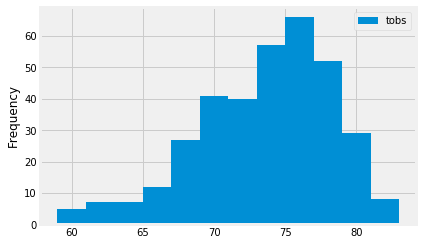

In [26]:
#ordenar por fecha
datos1 = datos1.sort_index(ascending=True)

#histogram plot with pandas
datos1.plot(kind='hist', bins=12)

In [27]:
# leer el csv en data frame
df = pd.read_csv("hawaii_measurements.csv")
# Pasar el tipo de fecha de string a datetime
df["date"]= pd.to_datetime(df['date'])
serie1 = df['date']
#agregar una columna con el mes
serie1.dt.month_name() 
df["mes"] = pd.DataFrame(serie1.dt.month_name())
# agregar año
serie1.dt.year
df["año"] = pd.DataFrame(serie1.dt.year)

#Separar Junio
junio=df.loc[df["mes"] == "June", :]


#Separar Diciembre
diciembre=df.loc[df["mes"] == "December", :]


Analisis de la temperatura del mes de junio

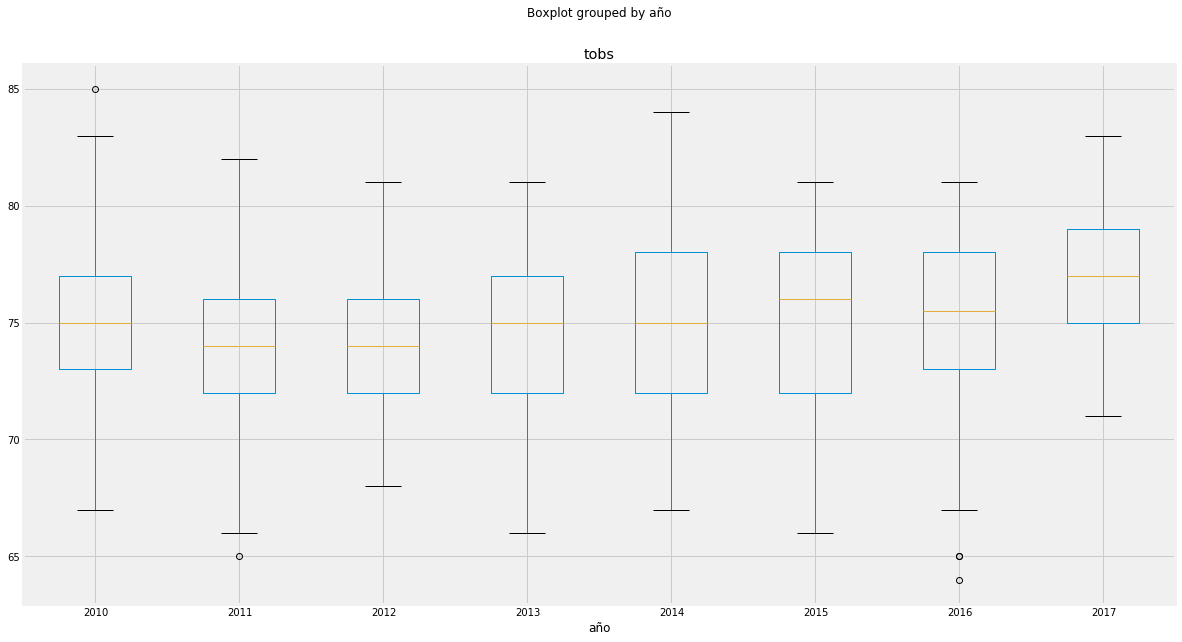

In [28]:
# Create a boxplot to compare means de JUNIO
junio.boxplot("tobs", by="año", figsize=(20, 10))

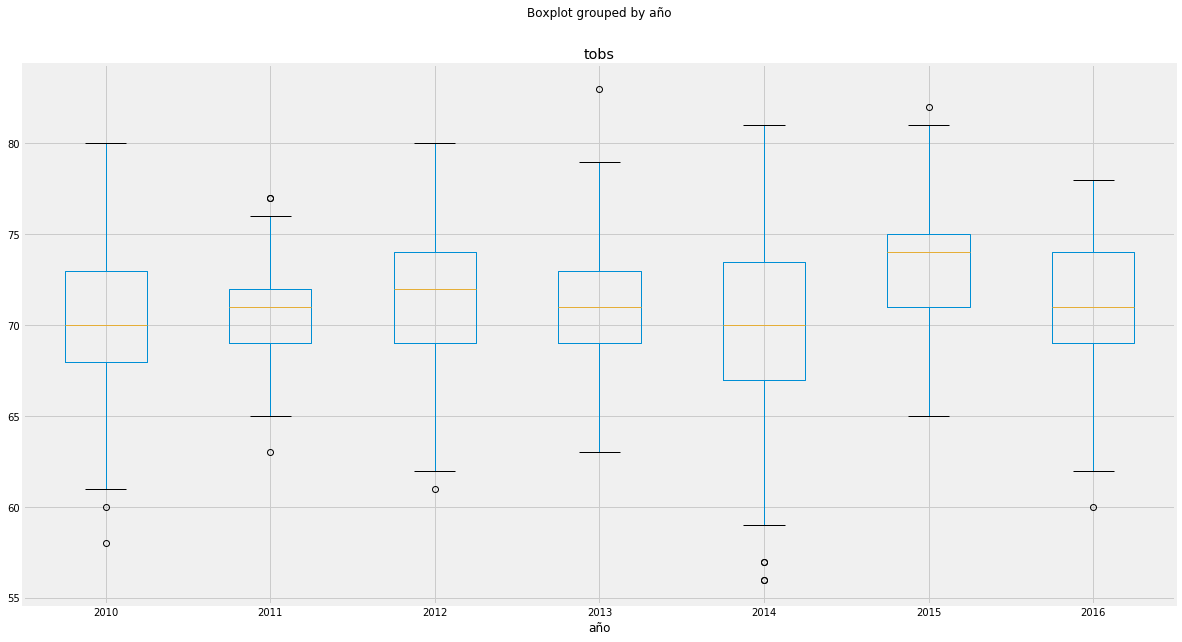

In [29]:
# Create a boxplot to compare means de DICIEMBRE
diciembre.boxplot("tobs", by="año", figsize=(20, 10))

In [30]:
# Extract individual groups
group1 = df[df["mes"] == "June"]["tobs"]
group2 = df[df["mes"] == "December"]["tobs"]

In [31]:
import scipy.stats as stats

In [32]:
# Perform the ANOVA
stats.f_oneway(group1, group2)

F_onewayResult(statistic=998.7953700363106, pvalue=3.9025129038620835e-191)

In [33]:
stats.ttest_ind(group1,group2, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

In [34]:
# Funcion calc_temp que usa fecha de inicio y fecha final en un formato'%Y-%m-%d' 

def calc_temps(start_date, end_date):

    return session.query(func.max(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs) ).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

#Retorna máximo, mínimo y promedio  temp entre la fechas inicial y final
# ejemplo
print(calc_temps('2017-01-01', '2018-01-01'))

[(87.0, 58.0, 74.14387974230493)]


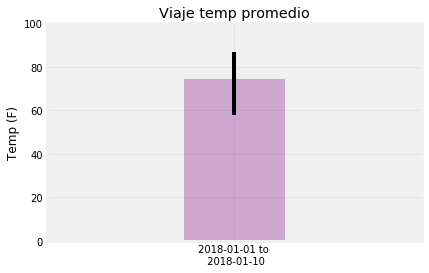

In [35]:
#calculate the tmin, tavg, and tmax 
trip = '2018-01-01 to \n 2018-01-10'
Temps = calc_temps('2017-01-01', '2018-01-01')
max_Temp = Temps[0][0]
min_Temp = Temps[0][1]
avg_Temp = Temps[0][2]


minError = avg_Temp - min_Temp
maxError = max_Temp - avg_Temp

errorBars = np.array([[minError], [maxError]])

plt.bar(trip, avg_Temp, yerr=errorBars, color = 'purple', alpha = .3)
plt.ylim(0, 100)
plt.xlim(-1.5, 1.5)
plt.title('Viaje temp promedio')
plt.ylabel('Temp (F)')
plt.grid(alpha=.3)


In [36]:
# funicón daily_normals que devuelvo los valores min,avg y maxico de temps de un día y mes de la base
def daily_normals(date):
   
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
#fecha inicial y final del viaje
fecha_ini = "2017-07-24"
fecha_fin = "2017-07-29"

#calcular la duración del viaje en dias

duracion = int(fecha_fin[-2:]) - int(fecha_ini[-2:])+ 1

#fecha incial como  datetime object
fecha_ini = dt.datetime.strptime(fecha_ini, '%Y-%m-%d')
#lista de fechas (MM-DD) del viaje

lista_fechas = [dt.datetime.strftime(fecha_ini + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, duracion)]

#Calcula la daily_normals del los dias de viaje
Normales = [daily_normals(date) for date in lista_fechas]

Normales

[[(69.0, 76.55555555555556, 81.0)],
 [(67.0, 76.89090909090909, 84.0)],
 [(71.0, 76.4423076923077, 86.0)],
 [(68.0, 76.58181818181818, 83.0)],
 [(69.0, 76.46428571428571, 82.0)],
 [(69.0, 76.47058823529412, 83.0)]]

In [38]:
#extrae  normals into a list of lists
Normales = [np.array(normal[0]) for normal in Normales]
#convierte normals list en  data frame
normalsTable = pd.DataFrame(Normales)
#Suma la columna fecha
normalsTable["Fecha"] = lista_fechas
#arregla el indice y renombra las columnas
normalsTable = normalsTable.set_index("Fecha")
normalsTable = normalsTable.rename(columns={0: "Baja Temp", 1: "Prom Temp", 2: "Alta Temp"})

normalsTable

,Baja Temp,Prom Temp,Alta Temp
Fecha,,,
07-24,69.0,76.555556,81.0
07-25,67.0,76.890909,84.0
07-26,71.0,76.442308,86.0
07-27,68.0,76.581818,83.0
07-28,69.0,76.464286,82.0
07-29,69.0,76.470588,83.0


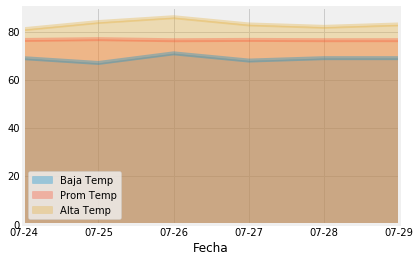

In [39]:
#grafica 
normalsTable.plot.area(stacked=False, alpha=.333)